# Rough comparison of important genes for AML vs. normal

## Set variables

In [1]:
import os
project_directory = '/data/BIDS-HPC/private/projects/dmi2'
my_important_genes_file = os.path.join(project_directory, 'data', 'important_genes_aml.pkl')
their_important_genes_file = os.path.join(project_directory, 'data', 'glmQLFTest_AMLvsNBM_fc2fdr05.txt') # don't worry this directory is inaccessible to all but George and myself on Biowulf

## Load my AML-vs-normal dataframe

In [2]:
# Note I generated the my_important_genes_file file in main.ipynb using:
#   import pickle, os
#   filename = os.path.join(project_directory, 'data', 'important_genes_aml.pkl')
#   with open(filename, 'wb') as f:
#       pickle.dump(important_genes_aml, f)
# Also note that my_scores here is exactly the same as important_genes_aml in main.ipynb

import pickle
with open(my_important_genes_file, 'rb') as f:
    my_scores = pickle.load(f)
my_scores

,place,norm_score,num_in_rank,raw_score,original score
ENSG00000068001,t-1,1.0,7,0.000433,0.000433
ENSG00000184669,t-1,1.0,7,0.000433,0.000433
ENSG00000087502,t-1,1.0,7,0.000433,0.000433
ENSG00000121440,t-1,1.0,7,0.000433,0.000433
ENSG00000181544,t-1,1.0,7,0.000433,0.000433
...,...,...,...,...,...
ENSG00000276026,0,0.0,0,0.000000,0.000000
ENSG00000135763,0,0.0,0,0.000000,0.000000
ENSG00000257550,0,0.0,0,0.000000,0.000000
ENSG00000213642,0,0.0,0,0.000000,0.000000


## Load their DE analysis in to a Pandas dataframe

In [3]:
import pandas as pd
their_scores = pd.read_csv(their_important_genes_file, sep='\t')
their_scores

,GeneName,GeneID,logFC,logCPM,F,PValue,FDR
0,MYBL1,ENSG00000185697,-4.602894,1.553099,456.251266,3.104960e-72,6.742110e-68
1,FCRL6,ENSG00000181036,-5.693966,0.948122,425.910242,9.657346e-69,1.048498e-64
2,SPTSSB,ENSG00000196542,-5.372245,-2.798670,398.901307,1.558698e-65,1.128186e-61
3,FTH1P22,ENSG00000225079,-5.029037,-2.886335,373.477587,2.007676e-62,1.089867e-58
4,ASH2LP1,ENSG00000224144,-5.065626,-2.988322,352.915910,7.684420e-60,3.337190e-56
...,...,...,...,...,...,...,...
2620,NFIB,ENSG00000147862,2.069687,-0.030091,5.143154,2.376835e-02,4.405785e-02
2621,LAMP5,ENSG00000125869,2.524025,4.881743,5.056075,2.497884e-02,4.599648e-02
2622,DPP10,ENSG00000175497,2.199781,0.258309,5.052136,2.503509e-02,4.607662e-02
2623,PCLO,ENSG00000186472,2.200748,0.198458,4.965719,2.630296e-02,4.810431e-02


## Add a normalized score for their data (0-1 range, just like I currently have for my results) and show what this score looks like

,GeneName,logFC,logCPM,F,PValue,FDR,norm_score
GeneID,,,,,,,
ENSG00000185697,MYBL1,-4.602894,1.553099,456.251266,3.104960e-72,6.742110e-68,1.000000
ENSG00000181036,FCRL6,-5.693966,0.948122,425.910242,9.657346e-69,1.048498e-64,0.952483
ENSG00000196542,SPTSSB,-5.372245,-2.798670,398.901307,1.558698e-65,1.128186e-61,0.907347
ENSG00000225079,FTH1P22,-5.029037,-2.886335,373.477587,2.007676e-62,1.089867e-58,0.862909
ENSG00000224144,ASH2LP1,-5.065626,-2.988322,352.915910,7.684420e-60,3.337190e-56,0.825899
...,...,...,...,...,...,...,...
ENSG00000147862,NFIB,2.069687,-0.030091,5.143154,2.376835e-02,4.405785e-02,0.020187
ENSG00000125869,LAMP5,2.524025,4.881743,5.056075,2.497884e-02,4.599648e-02,0.019908
ENSG00000175497,DPP10,2.199781,0.258309,5.052136,2.503509e-02,4.607662e-02,0.019897


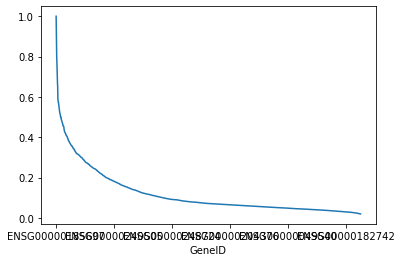

In [4]:
import numpy as np
tmp = -np.log10(their_scores['FDR']) # the non-normalized score is -log10(FDR)
their_scores['norm_score'] = tmp / tmp.max(axis=0)
their_scores = their_scores.set_index('GeneID') # set the dataframe index to the Ensembl ID
their_scores['norm_score'].plot()
their_scores

## Limit my data to roughly the most important genes (normalized score > 0.1) and similarly plot the scores

,place,norm_score,num_in_rank,raw_score,original score
ENSG00000068001,t-1,1.000000,7,0.000433,0.000433
ENSG00000184669,t-1,1.000000,7,0.000433,0.000433
ENSG00000087502,t-1,1.000000,7,0.000433,0.000433
ENSG00000121440,t-1,1.000000,7,0.000433,0.000433
ENSG00000181544,t-1,1.000000,7,0.000433,0.000433
...,...,...,...,...,...
ENSG00000139083,t-12,0.153846,1947,0.000067,0.000067
ENSG00000238111,t-12,0.153846,1947,0.000067,0.000067
ENSG00000102780,t-12,0.153846,1947,0.000067,0.000067
ENSG00000250746,t-12,0.153846,1947,0.000067,0.000067


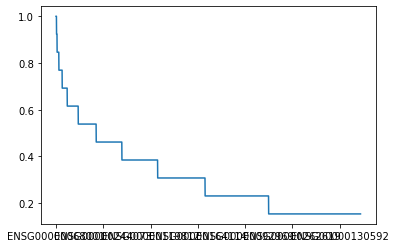

In [5]:
my_scores = my_scores[my_scores['norm_score']>0.1]
my_scores['norm_score'].plot()
my_scores

## Perform an inner join on the Ensembl IDs

In [6]:
all_scores = my_scores.join(their_scores, how='inner', lsuffix='-me', rsuffix='-them')
all_scores

,place,norm_score-me,num_in_rank,raw_score,original score,GeneName,logFC,logCPM,F,PValue,FDR,norm_score-them
ENSG00000153292,t-2,0.923077,12,0.000400,0.000400,GPR110,2.401678,-1.966619,7.454756,6.552394e-03,1.427774e-02,0.027472
ENSG00000088836,t-2,0.923077,12,0.000400,0.000400,SLC4A11,2.036883,-0.267762,11.523519,7.423866e-04,2.112737e-03,0.039826
ENSG00000104427,t-3,0.846154,38,0.000367,0.000367,ZC2HC1A,-3.272054,-1.336879,86.266845,4.955559e-19,2.869467e-17,0.246269
ENSG00000179403,t-3,0.846154,38,0.000367,0.000367,VWA1,3.701116,0.883318,26.475403,3.854256e-07,2.774911e-06,0.082725
ENSG00000225246,t-3,0.846154,38,0.000367,0.000367,RPS2P1,2.175516,-0.392433,15.769803,8.214427e-05,3.074781e-04,0.052287
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000100625,t-12,0.153846,1947,0.000067,0.000067,SIX4,2.909278,-2.134178,12.386449,4.723552e-04,1.420992e-03,0.042390
ENSG00000189120,t-12,0.153846,1947,0.000067,0.000067,SP6,3.038252,-1.145165,18.122807,2.478257e-05,1.072911e-04,0.059094
ENSG00000204956,t-12,0.153846,1947,0.000067,0.000067,PCDHGA1,2.182559,2.631066,12.700202,4.010324e-04,1.228038e-03,0.043334
ENSG00000235488,t-12,0.153846,1947,0.000067,0.000067,JARID2-AS1,2.449957,0.122012,35.808087,4.180172e-09,4.752265e-08,0.109021


## Average our scores together (with equal weighting) and normalize the result to the 0-1 range again

In [7]:
tmp = all_scores['norm_score-me'] + all_scores['norm_score-them']
all_scores['overall_score'] = tmp / tmp.max(axis=0)
all_scores

,place,norm_score-me,num_in_rank,raw_score,original score,GeneName,logFC,logCPM,F,PValue,FDR,norm_score-them,overall_score
ENSG00000153292,t-2,0.923077,12,0.000400,0.000400,GPR110,2.401678,-1.966619,7.454756,6.552394e-03,1.427774e-02,0.027472,0.697587
ENSG00000088836,t-2,0.923077,12,0.000400,0.000400,SLC4A11,2.036883,-0.267762,11.523519,7.423866e-04,2.112737e-03,0.039826,0.706653
ENSG00000104427,t-3,0.846154,38,0.000367,0.000367,ZC2HC1A,-3.272054,-1.336879,86.266845,4.955559e-19,2.869467e-17,0.246269,0.801705
ENSG00000179403,t-3,0.846154,38,0.000367,0.000367,VWA1,3.701116,0.883318,26.475403,3.854256e-07,2.774911e-06,0.082725,0.681684
ENSG00000225246,t-3,0.846154,38,0.000367,0.000367,RPS2P1,2.175516,-0.392433,15.769803,8.214427e-05,3.074781e-04,0.052287,0.659346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000100625,t-12,0.153846,1947,0.000067,0.000067,SIX4,2.909278,-2.134178,12.386449,4.723552e-04,1.420992e-03,0.042390,0.144014
ENSG00000189120,t-12,0.153846,1947,0.000067,0.000067,SP6,3.038252,-1.145165,18.122807,2.478257e-05,1.072911e-04,0.059094,0.156272
ENSG00000204956,t-12,0.153846,1947,0.000067,0.000067,PCDHGA1,2.182559,2.631066,12.700202,4.010324e-04,1.228038e-03,0.043334,0.144706
ENSG00000235488,t-12,0.153846,1947,0.000067,0.000067,JARID2-AS1,2.449957,0.122012,35.808087,4.180172e-09,4.752265e-08,0.109021,0.192913


## Sort by the overall score (descending), re-arrange the columns, and print the top 20 genes

In [8]:
all_scores = all_scores.sort_values('overall_score', ascending=False)
cols = all_scores.columns.tolist()
first_four = ['overall_score', 'norm_score-me', 'norm_score-them', 'GeneName']
cols_new = first_four + [x for x in filter(lambda y: y not in first_four, cols)]
all_scores = all_scores[cols_new]
all_scores[:20]

,overall_score,norm_score-me,norm_score-them,GeneName,place,num_in_rank,raw_score,original score,logFC,logCPM,F,PValue,FDR
ENSG00000168447,1.000000,0.846154,0.516470,SCNN1B,t-3,38,0.000367,0.000367,-4.458596,-2.764723,198.898325,3.276383e-38,2.032668e-35
ENSG00000104427,0.801705,0.846154,0.246269,ZC2HC1A,t-3,38,0.000367,0.000367,-3.272054,-1.336879,86.266845,4.955559e-19,2.869467e-17
ENSG00000130558,0.737913,0.615385,0.390113,OLFM1,t-6,233,0.000267,0.000267,-4.275702,-1.994927,143.544314,3.193224e-29,6.246637e-27
ENSG00000133574,0.706798,0.461538,0.501561,GIMAP4,t-8,544,0.000200,0.000200,-4.165698,2.900366,192.184955,3.698145e-37,2.039506e-34
ENSG00000088836,0.706653,0.923077,0.039826,SLC4A11,t-2,12,0.000400,0.000400,2.036883,-0.267762,11.523519,7.423866e-04,2.112737e-03
ENSG00000153292,0.697587,0.923077,0.027472,GPR110,t-2,12,0.000400,0.000400,2.401678,-1.966619,7.454756,6.552394e-03,1.427774e-02
ENSG00000179403,0.681684,0.846154,0.082725,VWA1,t-3,38,0.000367,0.000367,3.701116,0.883318,26.475403,3.854256e-07,2.774911e-06
ENSG00000144824,0.678111,0.769231,0.154780,PHLDB2,t-4,70,0.000333,0.000333,-2.356385,0.312400,52.343174,1.784429e-12,4.011086e-11
ENSG00000054654,0.667341,0.769231,0.140104,SYNE2,t-4,70,0.000333,0.000333,-2.333268,5.135965,47.024643,2.096949e-11,3.881770e-10
ENSG00000143365,0.663473,0.538462,0.365603,RORC,t-7,380,0.000233,0.000233,-3.667802,-1.045537,133.451199,1.694758e-27,2.766915e-25


While quite a few of these are involved in various cancers, cell proliferation, etc., only the fourth (GIMAP4) explicitly *may* have anything to do with AML; from its summary at NCBI: "...The encoded protein of this gene may be negatively regulated by T-cell acute lymphocytic leukemia 1 (TAL1)...." (I recognize this is ALL not AML).

Based on this and the fact that my "most promising gene" (NOL3, i.e., ARC [ENSG00000140939], tied for second most important) is not in their list while their *potentially* "most promising gene" (MYBL1 [ENSG00000185697], their most differentially expressed gene) is not in my list...

In [9]:
# See whether my most promising gene is in their list
my_most_promising_gene = 'ENSG00000140939'
try:
    their_scores.loc[my_most_promising_gene,:]
    print('My "most promising" gene, ' + my_most_promising_gene + ', IS in their list')
except:
    print('My "most promising" gene, ' + my_most_promising_gene + ', is NOT in their list')

# See whether their most promising gene is in my list
their_most_promising_gene = 'ENSG00000185697'
try:
    my_scores.loc[their_most_promising_gene,:]
    print('Their "most promising" gene, ' + their_most_promising_gene + ', IS in my list')
except:
    print('Their "most promising" gene, ' + their_most_promising_gene + ', is NOT in my list')

My "most promising" gene, ENSG00000140939, is NOT in their list
Their "most promising" gene, ENSG00000185697, is NOT in my list


...I am developing the feeling that our lists either fundamentally do not agree or that they are not on "equal footing" because they seem to be using GRCh37 while we use GRCh38. (I am unsure how much that actually matters!) Note again that I did not run the most rigorous feature-importance (i.e., gene-importance) study.

## Write a function to get the current gene names from a list of Ensembl IDs

In [10]:
# This is based off the example at https://rest.ensembl.org/documentation/info/lookup_post
def get_display_names(list_of_ensembl_ids):
    string_version_of_list = str(list_of_ensembl_ids).replace('\'', '"')
    import requests, sys
    server = "https://rest.ensembl.org"
    ext = "/lookup/id"
    headers={ "Content-Type" : "application/json", "Accept" : "application/json"}
    r = requests.post(server+ext, headers=headers, data='{ "ids" : ' + string_version_of_list + ' }')
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    decoded = r.json()
    return([decoded[x]['display_name'] if decoded[x] is not None else None for x in list_of_ensembl_ids]) # return the display names in the same order as the inputted Ensembl IDs

## Get the gene names for my most important genes and add them to my dataframe

In [11]:
chunk_size = 1000 # maximum call to POST method for the Ensembl REST API
full_list = my_scores.index.to_list()
full_list_size = len(full_list)
ncalls = int(np.ceil(full_list_size/chunk_size))
start_ind = 0
display_name_list = []
for icall in range(ncalls):
    print('On call #{} to the Ensembl REST API...'.format(icall+1))
    if icall != ncalls-1:
        end_ind = start_ind + chunk_size
    else:
        end_ind = full_list_size
    display_name_list = display_name_list + get_display_names(full_list[start_ind:end_ind])
    start_ind = end_ind
my_scores['display_name'] = display_name_list

On call #1 to the Ensembl REST API...
On call #2 to the Ensembl REST API...
On call #3 to the Ensembl REST API...
On call #4 to the Ensembl REST API...
On call #5 to the Ensembl REST API...
On call #6 to the Ensembl REST API...
On call #7 to the Ensembl REST API...


## Write the scores to disk in order to give my larger list of important gene names to Daoud's group

In [12]:
my_scores.to_csv(os.path.join(project_directory, 'data', 'andrews_aml_vs_normal_scores.tsv'), sep='\t', float_format='%8.6f')